feature: pclass, sex, fare
label: survived
1. 1등급, female, 32달러 인경우 생사유무를 예측하시요 
2. train, test, f1 score 를 구하시요
3. confusion matrix 를 구하고 heatmap 을 그리시요.
4. roc curve 를 그리시요.
5~ 8 .titanic 통계값을 구하시요(문제는 자율)

In [23]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer



import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

import warnings
warnings.simplefilter('ignore')

In [30]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [31]:
x_data = titanic[['pclass', 'sex', 'fare']]
y_data = titanic[['survived']]

display(x_data)
display(y_data)

,pclass,sex,fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500
...,...,...,...
886,2,male,13.0000
887,1,female,30.0000
888,3,female,23.4500
889,1,male,30.0000


,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [32]:
x_data= pd.get_dummies(x_data)
x_data

,pclass,fare,sex_female,sex_male
0,3,7.2500,0,1
1,1,71.2833,1,0
2,3,7.9250,1,0
3,1,53.1000,1,0
4,3,8.0500,0,1
...,...,...,...,...
886,2,13.0000,0,1
887,1,30.0000,1,0
888,3,23.4500,1,0
889,1,30.0000,0,1


In [33]:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.2, random_state=1)

model_logistic = make_pipeline(StandardScaler(), LogisticRegression())
param_value = {'logisticregression__C': np.linspace(0,1, 50),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model_logistic, param_grid = param_value,
                    scoring='f1' )
gridS.fit(x_train, y_train)


C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\medici\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalt

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.346938...
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet', 'none'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
     

### 1. 1등급, female, 32달러 인경우 생사유무를 예측하시오.

In [34]:
gridS.best_estimator_.predict([[1, 32, 0, 1]]) #남성의 경우

array([0], dtype=int64)

### 2. train, test, f1 score 를 구하시요

In [35]:
# train
y_pred = gridS.best_estimator_.predict(x_train)
print('train_f1_score', f1_score(y_train,y_pred))

# test
y_pred = gridS.best_estimator_.predict(x_test)
print('test_f1_score', f1_score(y_test,y_pred))


train_f1_score 0.7129094412331406
test_f1_score 0.7194244604316548


### 3. confusion matrix 를 구하고 heatmap 을 그리시오.

array([[90, 16],
       [23, 50]], dtype=int64)

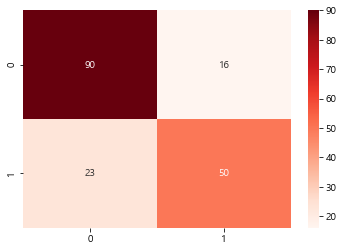

정밀도:  0.7575757575757576
재현율:  0.684931506849315
f1 score:  0.7194244604316548


In [73]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
display(cm)
# heatmap
sns.heatmap(cm, cmap='Reds',annot=True)
plt.show()

# precision, recall, f1 score
print('정밀도: ', precision_score(y_test, y_pred))
print('재현율: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))

### 4. roc curve 를 그리시오.

,survived,proba
862,1,0.908236
223,0,0.094782
84,1,0.790755
680,0,0.593647
535,1,0.773529
...,...,...
796,1,0.908236
815,0,0.409094
629,0,0.094769
421,0,0.094769


,survived,proba
258,1,0.940087
708,1,0.917684
195,1,0.917324
742,1,0.916844
257,1,0.912908
...,...,...
175,0,0.089915
59,0,0.088209
386,0,0.088209
819,0,0.086772


[0.         0.         0.         0.         0.         0.00943396
 0.00943396 0.00943396 0.00943396 0.00943396 0.00943396 0.01886792
 0.01886792 0.02830189 0.02830189 0.02830189 0.03773585 0.04716981
 0.04716981 0.0754717  0.08490566 0.08490566 0.08490566 0.08490566
 0.08490566 0.09433962 0.09433962 0.11320755 0.11320755 0.13207547
 0.13207547 0.16981132 0.16981132 0.19811321 0.19811321 0.20754717
 0.20754717 0.23584906 0.23584906 0.23584906 0.25471698 0.27358491
 0.32075472 0.35849057 0.36792453 0.4245283  0.45283019 0.45283019
 0.46226415 0.46226415 0.48113208 0.48113208 0.5        0.51886792
 0.54716981 0.56603774 0.5754717  0.62264151 0.63207547 0.71698113
 0.72641509 0.74528302 0.75471698 0.77358491 0.78301887 0.80188679
 0.82075472 0.85849057 0.87735849 0.89622642 0.90566038 0.9245283
 0.93396226 0.93396226 0.95283019 0.96226415 0.98113208 1.        ]
[0.         0.01369863 0.05479452 0.08219178 0.15068493 0.15068493
 0.17808219 0.23287671 0.26027397 0.30136986 0.32876712 0.3561

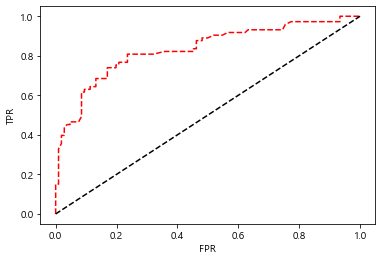

In [70]:
# 최적 모델 예측값을 p에 저장
p = gridS.best_estimator_.predict_proba(x_test)
p

# y_test를 df에 copy (y_test를 데이터프레임으로 뽑음)
df = y_test.copy()
df['proba'] = p[:,1]
display(df)

# 내린차순
display(df.sort_values(by='proba', ascending=False))

# roc_curve(y_test, p[:,1])
fpr, tpr, thresholds = roc_curve(y_test, p[:,1])
print(fpr)
print(tpr)
print(thresholds)

plt.plot(fpr, tpr,'r--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### 5. parch를 추가한 데이터에서 상관관계 분석 후 히트맵으로 표시하시오.

In [2]:
import seaborn as sns

In [17]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
df1 =titanic[['pclass', 'sex', 'fare','parch', 'survived']]
df1

,pclass,sex,fare,parch,survived
0,3,male,7.2500,0,0
1,1,female,71.2833,0,1
2,3,female,7.9250,0,1
3,1,female,53.1000,0,1
4,3,male,8.0500,0,0
...,...,...,...,...,...
886,2,male,13.0000,0,0
887,1,female,30.0000,0,1
888,3,female,23.4500,2,0
889,1,male,30.0000,0,1


In [8]:
import seaborn as sb
import matplotlib.pyplot as plt

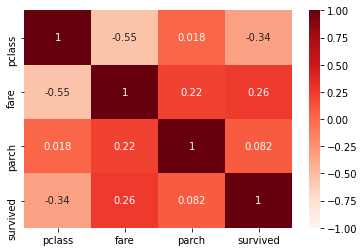

In [13]:
sb.heatmap(df1.corr(), annot=True, vmin = -1, vmax = 1, cmap='Reds')
plt.show()

### 6. feature에 parch를 추가하고 test데이터의 f1-score를 구하시오.

In [24]:
ct = ColumnTransformer([('ohe',OneHotEncoder(sparse=False) ,['pclass', 'sex']),
                        ('scaler', StandardScaler(), ['fare'])])
model = make_pipeline(ct, LogisticRegression())

In [25]:
param_value = {'logisticregression__C': np.linspace(0,1, 20),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model, param_grid = param_value,
                    scoring='f1' )
gridS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(sparse=False),
                                                                         ['pclass',
                                                                          'sex']),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['fare'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579,

In [29]:
gridS.best_score_

0.7037896901626199

In [30]:
gridS.best_params_

{'logisticregression__C': 0.05263157894736842,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg'}

In [31]:
y_pred = gridS.best_estimator_.predict(x_test)

In [32]:
print('test f1-score :', f1_score(y_test, y_pred))

test f1-score : 0.7261904761904763


### 7. parch를 추가한 데이터에서  VIF를 구하시오.

In [33]:
# 데이터 프레임 정의
df1 = titanic[['pclass', 'sex', 'fare', 'parch','survived']]
df1 = pd.get_dummies(df1)

# vif 모듈 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif 데이터 프레임 생성
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df1.values,i ) for i in range(df1.shape[1])]
vif['feature'] = df1.columns
vif


,VIF Factor,feature
0,1.582005,pclass
1,1.555745,fare
2,1.140623,parch
3,1.587511,survived
4,8.710427,sex_female
5,11.719077,sex_male


### 8-1. 생존자는 어느 class에 어느 성별에 많을까

<AxesSubplot:xlabel='class', ylabel='count'>

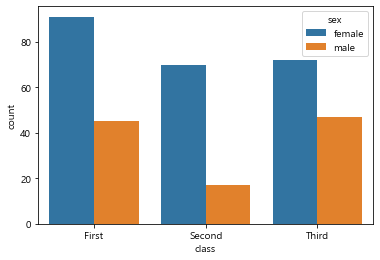

In [61]:
sns.countplot(data=titanic.query('survived==1'), x='class', hue='sex')

* first class의 생존자가 가장 많고 모든 class에서 여자의 생존자가 제일 많다.

In [36]:
titanic.groupby(['class', 'sex'])['survived'].sum()

class   sex   
First   female    91
        male      45
Second  female    70
        male      17
Third   female    72
        male      47
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

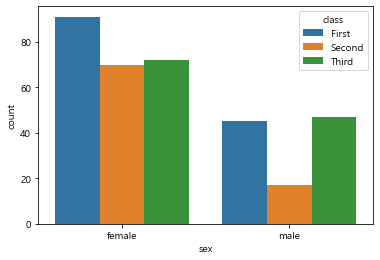

In [63]:
sns.countplot(data=titanic.query('survived==1'), x='sex', hue='class')

### 8-2. 나이에 따라 생존률이 달라질까?

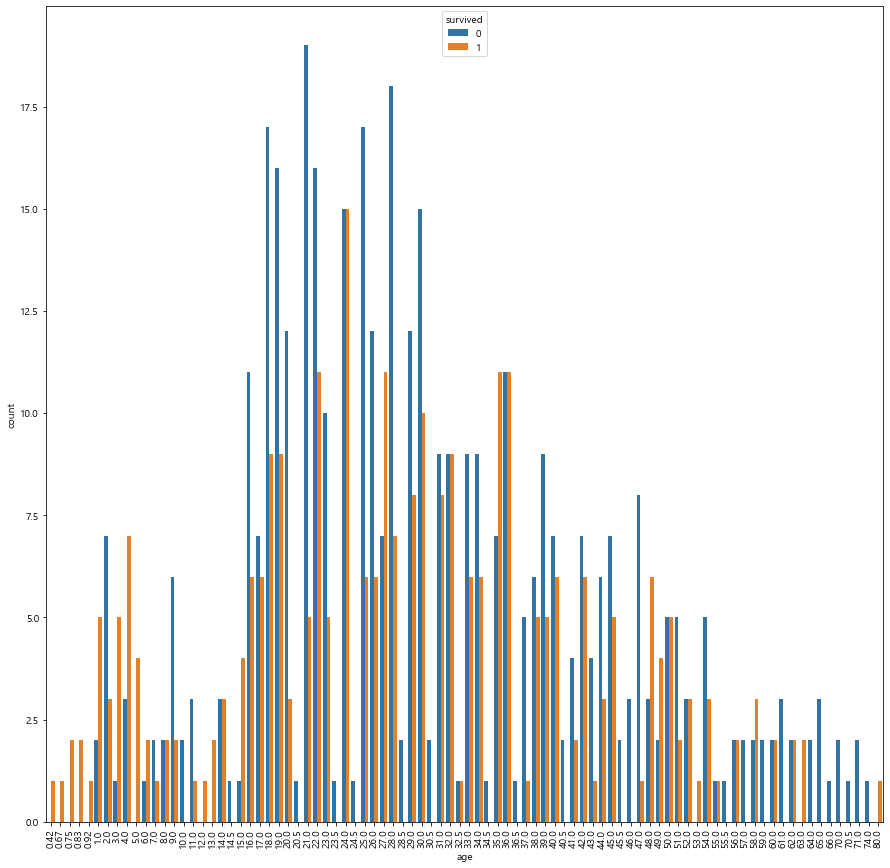

In [37]:
plt.figure(figsize=(15,15))
sns.countplot(data=titanic, x='age', hue='survived')
plt.xticks(rotation=90)
plt.show()

* 나이가 어린부분에서 생존률이 높고 고령은 생존률이 낮다.

### 8-3.  성별에 따른 생존자와 사망자의 나이 분포를 확인하시오.

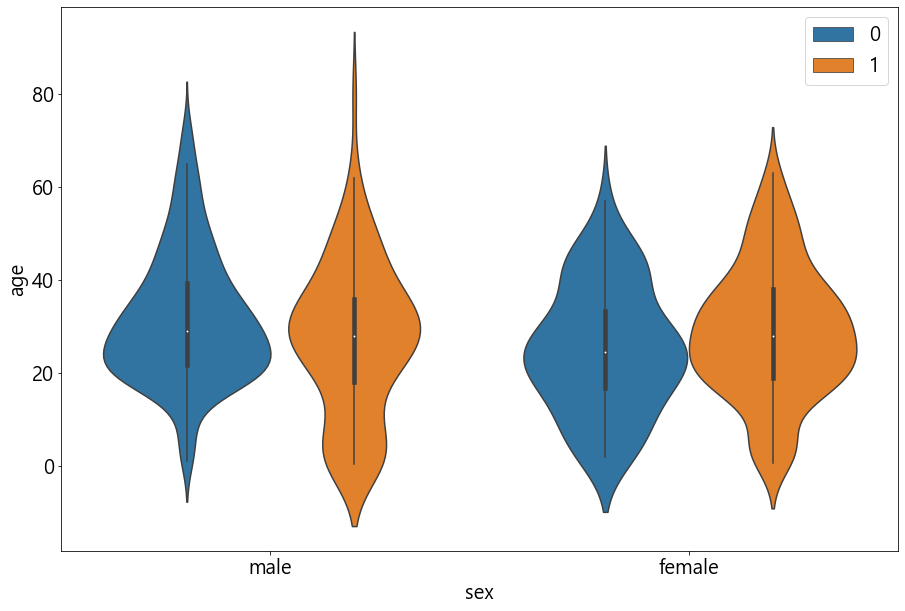

In [88]:
plt.figure(figsize=(15,10))
sns.violinplot(x='sex', y='age', data=titanic, hue='survived')
plt.xlabel('sex',fontsize=20)
plt.ylabel('age',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.show()